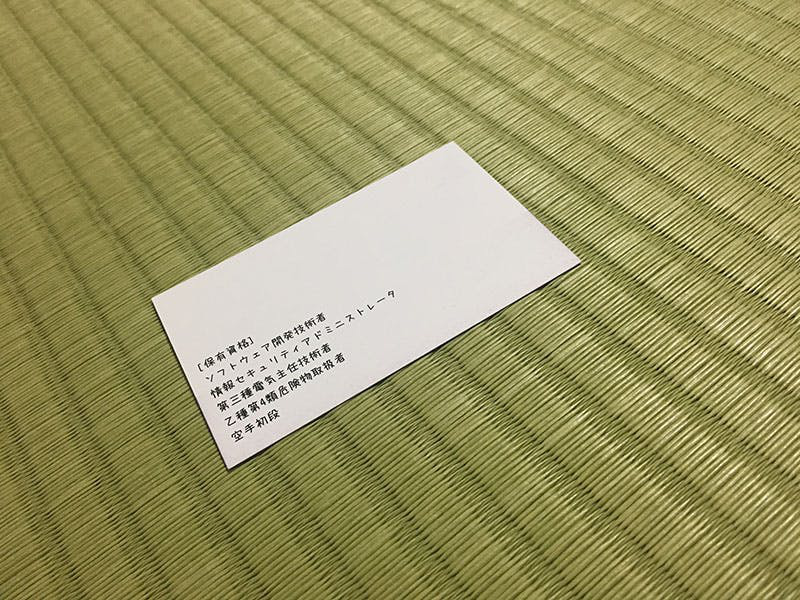

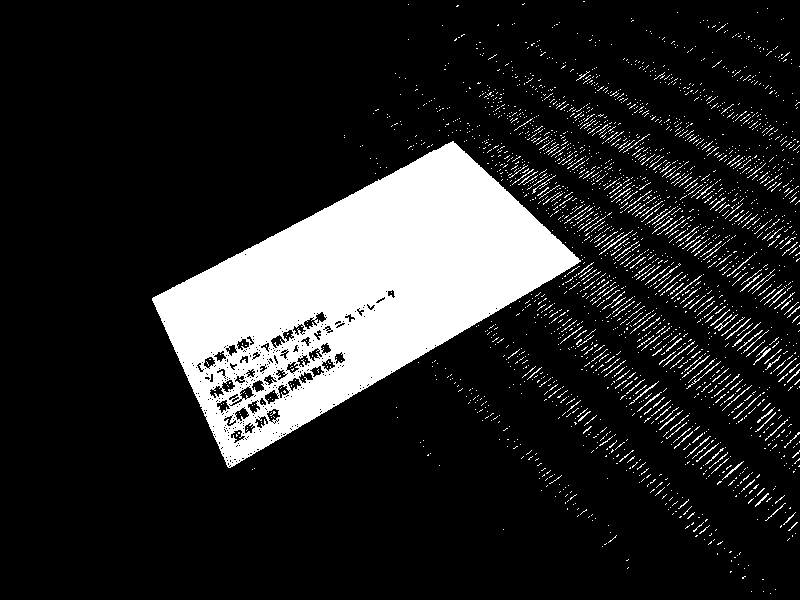

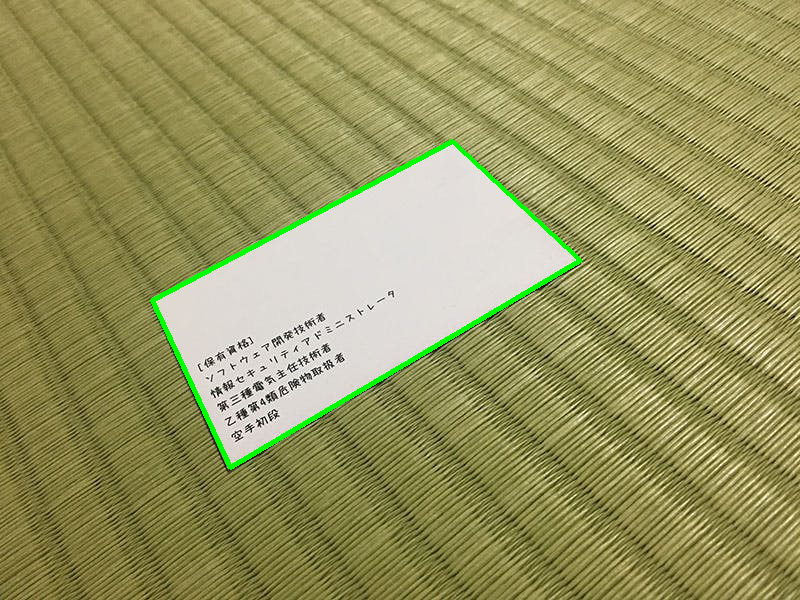

In [7]:
import cv2
import numpy as np

from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))
    
img = cv2.imread("qiita-sample.png")
display_cv_image(img)

# グレイスケール化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二値化
ret,th1 = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)
display_cv_image(th1)

# 輪郭抽出
# findContoursメソッドは、OpenCV でオブジェクトの輪郭を検出するメソッド
contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 面積の大きいもののみ選別
areas = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10000:
        epsilon = 0.1*cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        areas.append(approx)

cv2.drawContours(img,areas,-1,(0,255,0),3)
display_cv_image(img)

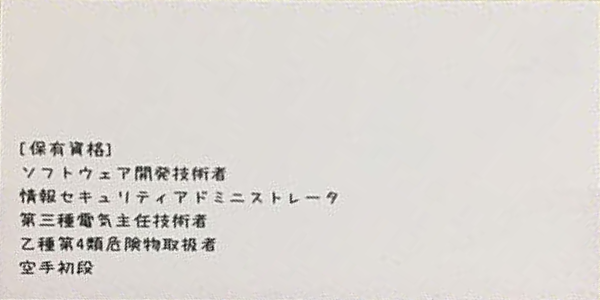

In [16]:
img = cv2.imread("qiita-sample.png")

dst = []

pts1 = np.float32(areas[0])
pts2 = np.float32([[600,300],[600,0],[0,0],[0,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst_img = cv2.warpPerspective(img,M,(600,300))

display_cv_image(dst_img)